### Nhập/xuất ảnh và hiển thị ảnh với Python

In [118]:
import numpy as np
from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, multiply
import PIL.ImageStat as stat
from skimage.io import imread, imsave, imshow, show
from skimage import color, img_as_float, data
from skimage.transform import SimilarityTransform, warp, swirl
from skimage.util import random_noise
import matplotlib.image as mpimg
import matplotlib.pylab as plt
from scipy import misc

In [119]:
im = Image.open("../images/parrot.png") # read the image, provide the correct path
print(im.width, im.height, im.mode, im.format, type(im))
im.show() # display the image

453 340 RGB PNG <class 'PIL.PngImagePlugin.PngImageFile'>


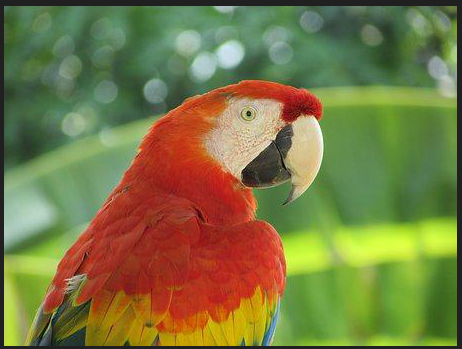

chuyển ảnh màu RGB sang ảnh mức xám:

In [120]:
im_g = im.convert('L') # convert the RGB color image to a grayscale image
im_g.save('../images/parrot_gray.png') # save the image to disk
Image.open("../images/parrot_gray.png").show() # read the grayscale image from disk and show


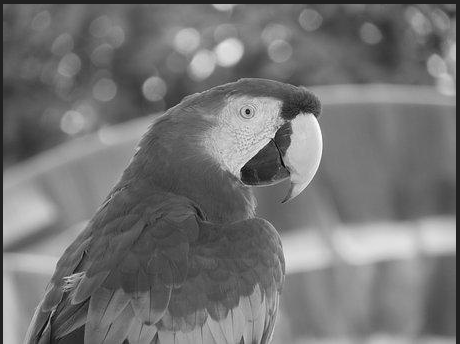

## Đọc, ghi, và hiển thị ảnh sử dụng Matplotlib

(960, 1280, 4) float32 <class 'numpy.ndarray'>


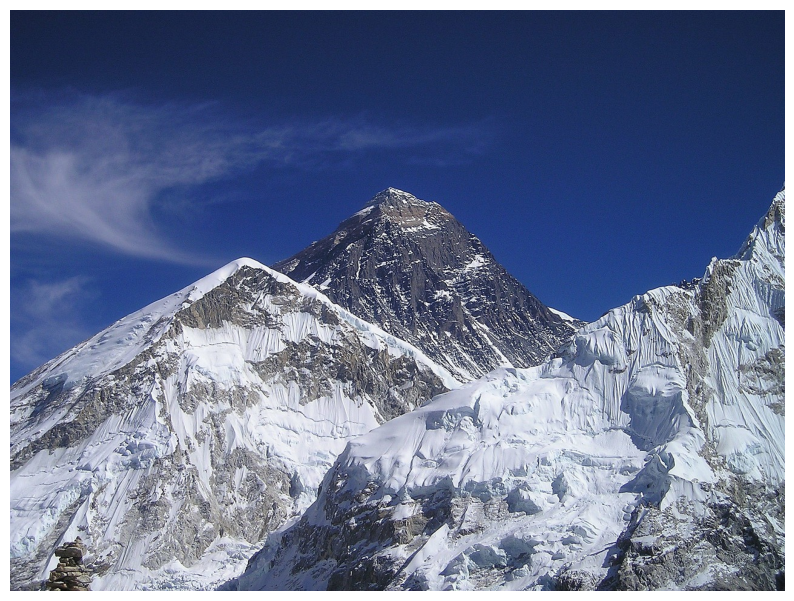

In [121]:
im = mpimg.imread("../images/hill.png") # read the image from disk as a numpy ndarray
print(im.shape, im.dtype, type(im)) # this image contains an α channel, hence num_channels= 4
plt.figure(figsize=(10,10))
plt.imshow(im) # display the image
plt.axis('off')
plt.show()

## Đọc, ghi và hiển thị ảnh sử dụng scikit-image


(340, 453, 3) uint8 <class 'numpy.ndarray'>


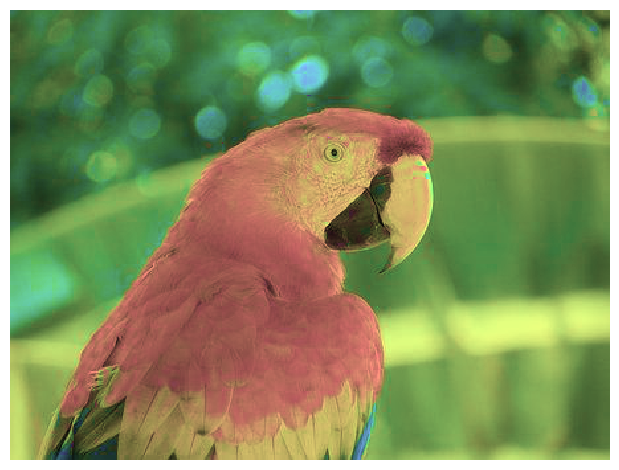

((np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0)),
 None)

In [122]:
im = imread("../images/parrot.png") # read image from disk, provide the correct path
print(im.shape, im.dtype, type(im))
hsv = color.rgb2hsv(im) # from RGB to HSV color space
hsv[:, :, 1] = 0.5 # change the saturation
im1 = color.hsv2rgb(hsv) # from HSV back to RGB
# Sử dụng img_as_ubyte để chuyển về uint8 trước khi lưu
imsave('../images/parrot_hsv.png', (im1 * 255).astype(np.uint8))
im = imread("../images/parrot_hsv.png")
plt.axis('off'), imshow(im), show()

## Sử dụng dataset astronaut từ scikit-image

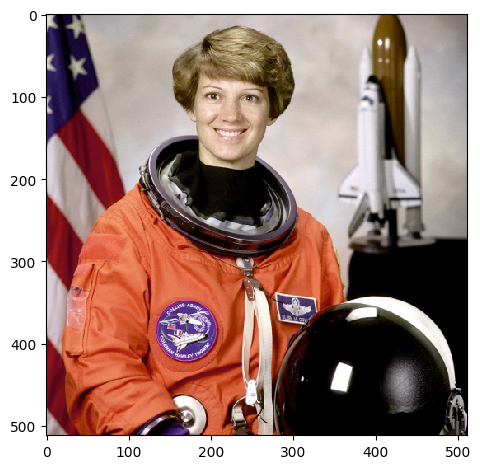

(<matplotlib.image.AxesImage at 0x15cb63c7150>, None)

In [123]:
im = data.astronaut()
imshow(im), show()

# Các thao tác hình ảnh cơ bản

### Các thao tác với ảnh với numpy array slicing


[180  76  83]


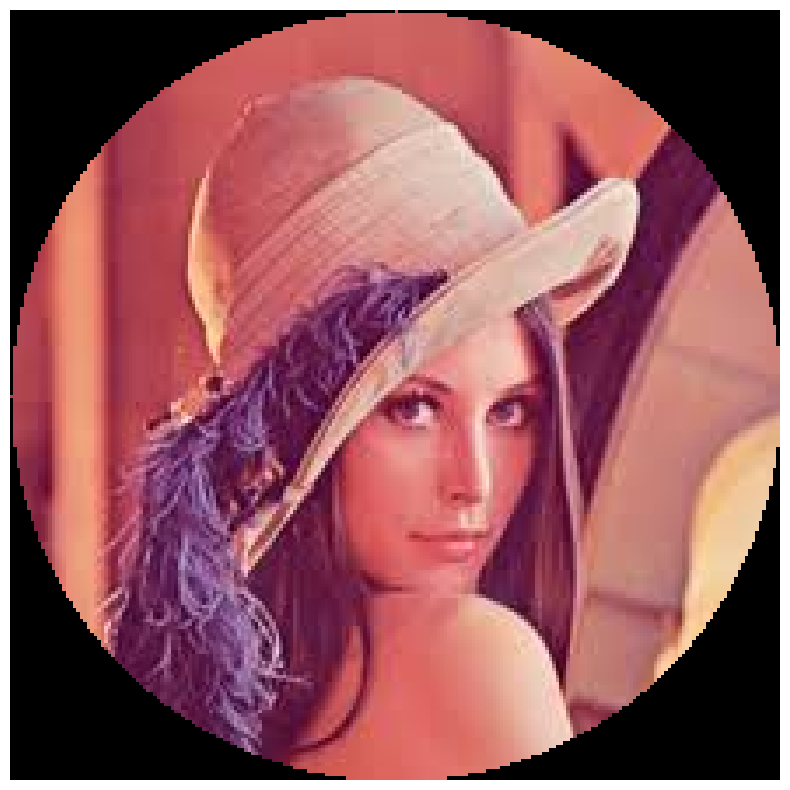

(<matplotlib.image.AxesImage at 0x15cb4cf6350>,
 (np.float64(-0.5), np.float64(219.5), np.float64(219.5), np.float64(-0.5)),
 None)

In [124]:
from skimage.io import imread
lena = imread("../images/lena.jpg") 
print(lena[0, 40])
lx, ly, _ = lena.shape
X, Y = np.ogrid[0:lx, 0:ly]
mask = (X - lx / 2) ** 2 + (Y - ly / 2) ** 2 > lx * ly / 4
lena[mask,:] = 0 # masks
plt.figure(figsize=(10,10))
plt.imshow(lena), plt.axis('off'), plt.show()

### Các thao tác ảnh với PIL


In [125]:
im = Image.open("../images/parrot.png") # open the image, provide the correct path
print(im.width, im.height, im.mode, im.format) # print image size, mode and format

453 340 RGB PNG


#### Cắt một ảnh


In [126]:
im_c = im.crop((175,75,320,200)) 
# crop the rectangle given by (left, top, right, bottom) from the image
im_c.show()

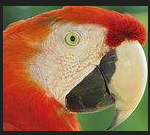

#### Chỉnh kích thước ảnh


#### Đổi ảnh sang ảnh thang mức xám

In [127]:
im_g = im.convert('L') # convert the RGB color image to a grayscale image

#### Một vài biến đổi mức xám

##### Biến đổi logarith:

In [128]:
im_g.point(lambda x: 255*np.log(1+x/255)).show()

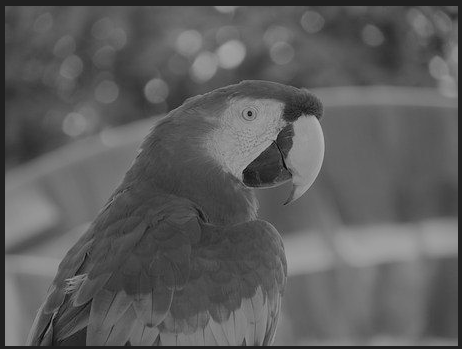

##### Biến đổi lũy thừa

In [129]:
im_g.point(lambda x: 255*(x/255)**0.6).show()

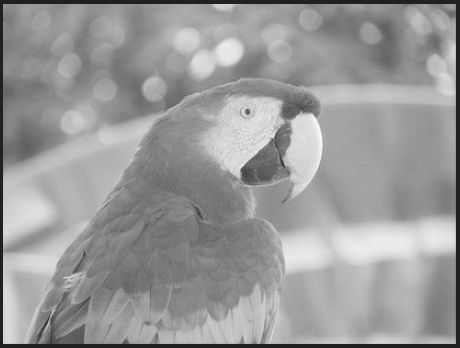

#####  Một số phép biến đổi hình học
##### Phản chiếu một hình ảnh



In [130]:
im.transpose(Image.FLIP_LEFT_RIGHT).show() # reflect about the vertical axis

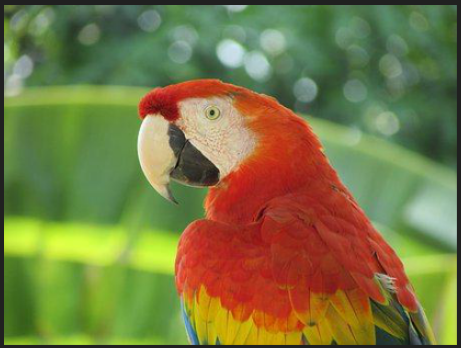

##### Quay trục hình ảnh

In [131]:
im_45 = im.rotate(45) # rotate the image by 45 degrees
im_45.show() # show the rotated image

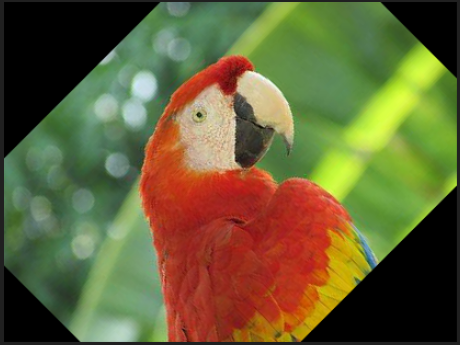

#####  Thay đổi giá trị pixel của một ảnh


##### Thêm nhiễu muối và tiêu vào ảnh

In [132]:
# choose 5000 random locations inside image
im1 = im.copy() # keep the original image, create a copy
n = 5000
x, y = np.random.randint(0, im.width, n), np.random.randint(0, im.height,
n)
for (x,y) in zip(x,y):
  im1.putpixel((x, y), ((0,0,0) if np.random.rand() < 0.5 else
  (255,255,255))) # salt-and-pepper noise
im1.show()

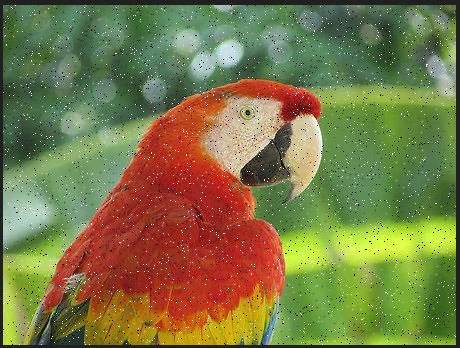

##### Vẽ lên ảnh

In [133]:
im = Image.open("../images/parrot.png")
draw = ImageDraw.Draw(im)
draw.ellipse((125, 125, 200, 250), fill=(255,255,255,128))
del draw
im.show()

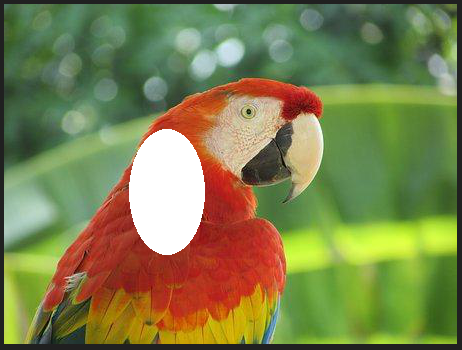

##### Viết chữ lên ảnh

In [134]:
draw = ImageDraw.Draw(im)
font = ImageFont.truetype("arial.ttf", 23) # use a truetype font
draw.text((10, 5), "Welcome to image processing with python", font=font)
del draw
im.show()

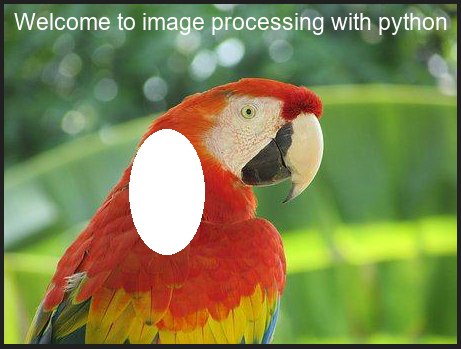

##### Tạo một thumbnail

In [135]:
im = Image.open("../images/parrot.png")
im_thumbnail = im.copy() # need to copy the original image first
im_thumbnail.thumbnail((100,100))
# now paste the thumbnail on the image
im.paste(im_thumbnail, (10,10))
im.save("../images/parrot_thumb.jpg")
im.show()

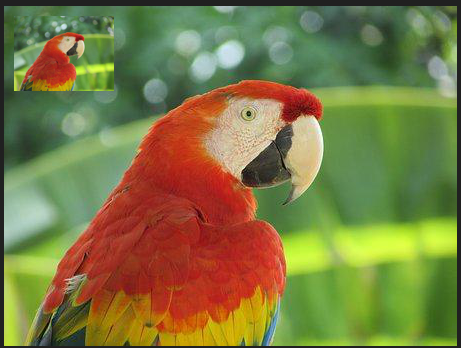

##### Vẽ biểu đồ histogram của các giá trị pixel cho các kênh RGB của ảnh:

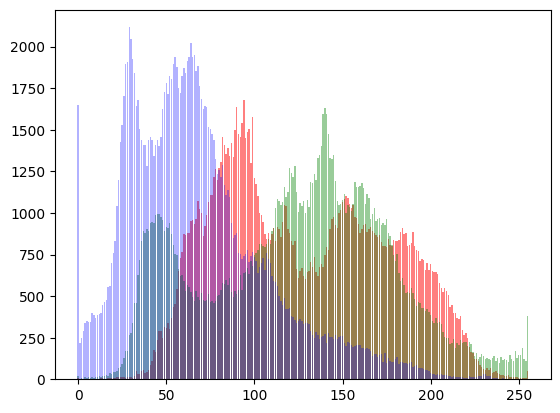

In [136]:
pl = im.histogram()
plt.bar(range(256), pl[:256], color='r', alpha=0.5)
plt.bar(range(256), pl[256:2*256], color='g', alpha=0.4)
plt.bar(range(256), pl[2*256:], color='b', alpha=0.3)
plt.show()

##### Chồng hai hình ảnh lên nhau


In [137]:
im1 = Image.open("../images/parrot.png")
im2 = Image.open("../images/hill.png").convert('RGB').resize((im1.width,
im1.height))
multiply(im1, im2).show()

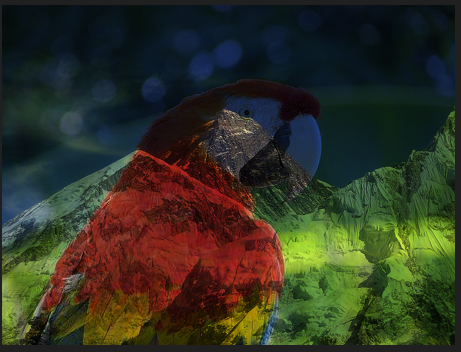

##### Tính toán sự khác biệt giữa hai ảnh

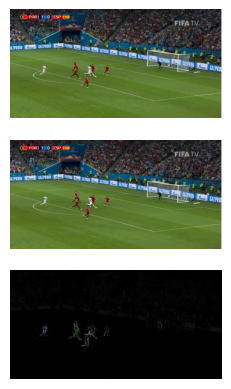

In [138]:
from PIL.ImageChops import difference
im1 = Image.open("../images/goal1.png") # load two consecutive frame images from the video
im2 = Image.open("../images/goal2.png")
im = difference(im1, im2)
im.save("../images/goal_diff.png")
plt.subplot(311)
plt.imshow(im1)
plt.axis('off')
plt.subplot(312)
plt.imshow(im2)
plt.axis('off')
plt.subplot(313)
plt.imshow(im), plt.axis('off')
plt.show()